In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [2]:
#importing the dataset and checking it
df=pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
#to check no. of rows and cols
df.shape

(13320, 9)

In [4]:
#examining the area feature
#First selecting only the unique values and counting the non-null values
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
#seperate out some columns i.e., keeping the nessecary ones in a new df
filtered_df=df.drop(['area_type','society','balcony','availability'],axis='columns')
filtered_df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


## DATA CLEANING

In [6]:
#starting the data cleaning stage
#handling the NaN values
filtered_df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
#we can replace the values for columns by taking median but since the dataset is pretty big then we can drop them
filtered_NaN_df=filtered_df.dropna()
filtered_NaN_df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [8]:
#exploring size feature
#some values in size are in bhk form some in other then:
filtered_NaN_df.shape

(13246, 5)

In [9]:
#gives unique values in pandas series
filtered_NaN_df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [10]:
#since we saw that for eg: 4bhk and 4 bedroom indicates same thing then:
#creating new column to address this and apply some lambda function i.e., by taking a specific string like '2 BHK' and tokenize it by space to extract out say foreg 2 and storing it in this column
# the lambda function, where x will have each rows and on those values we will split each string using space and extract 1st value from that string
filtered_NaN_df['bhk']=filtered_NaN_df['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\rizza\AppData\Local\Temp\ipykernel_4420\3855077356.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_NaN_df['bhk']=filtered_NaN_df['size'].apply(lambda x: int(x.split(' ')[0]))


In [11]:
filtered_NaN_df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
#to check the unique values in bhk
filtered_NaN_df['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
#using this data we can also determine where a specific type of house we can get
filtered_NaN_df[filtered_NaN_df.bhk>20]
#there was an error to be found here i.e., logically for a 43 bedroom i.e., it can't be 2400 sqft then checking this column

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [14]:
#by doing this we can see that there are some invalid values needed to be catered eg:1133-1384 (solve using avg of them)
filtered_NaN_df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
#first checking variations in this total sqft and for that we detect whether the column's value are float or not
def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
#applying the isFloat function for invalid values as it will give true on filtered_NaN_df[filtered_NaN_df['total_sqft'].apply(isFloat)]
filtered_NaN_df[~filtered_NaN_df['total_sqft'].apply(isFloat)].head(20)
#by doing this we saw that there is impurity or inconsistent data in this column then:

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
#to handle this: ignore rows having these values 4125Perch and take avg of values in range form 
# we can also convert unit for these values: 34.46Sq.Meter, 4125Perch but just ignoring them here
def sqft_to_num(x):
    tkn=x.split('-')
    if len(tkn) == 2:
        return (float(tkn[0])+float(tkn[1]))/2
    try:
        return float(x)
    except:
        return None

In [18]:
#testing this function for a random number (not in dataset)
print(sqft_to_num('2166'))
print(sqft_to_num('2100 - 2850'))
print(sqft_to_num('34.46Sq. Meter'))

2166.0
2475.0
None


In [19]:
#applying this function on total_sqft column and creating a new df
filtered_NaN_df_copy=filtered_NaN_df.copy()
filtered_NaN_df_copy['total_sqft']=filtered_NaN_df_copy['total_sqft'].apply(sqft_to_num)
filtered_NaN_df_copy.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [20]:
filtered_NaN_df_copy.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

## FEATURE ENGINEERING

In [21]:
cleaned_df=filtered_NaN_df_copy.copy()
#creating a new col named price/sqft and total price
#this will help in cleaning outliers
#*100000 shows values of this new column in lacs
cleaned_df['price_per_sqft']=cleaned_df['price']*100000/cleaned_df['total_sqft']
cleaned_df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [22]:
#explore location column:how many locations r there, how many rows r available in dataset per location
#if many locations, may create a prob as too much feature i.e., high dimensionality prob
len(cleaned_df.location.unique())

1304

In [23]:
# to reduce or resolve we can go for other 
# first remove leading space in this column using lambda function
cleaned_df.location=cleaned_df.location.apply(lambda x: x.strip())
#groupby dataset by using location
location_stats=cleaned_df.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [24]:
#to set some locations which have less datapoints we'll try to move them in 'other' category say below 10
#checking how many points are below 10
len(location_stats[location_stats<=10])

1052

In [25]:
loc_less_than_10=location_stats[location_stats<=10]
loc_less_than_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [26]:
cleaned_df.location=cleaned_df.location.apply(lambda x: 'other' if x in loc_less_than_10 else x)
len(cleaned_df.location.unique())

242

In [27]:
cleaned_df.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## OUTLIER DETECTION/REMOVAL

In [28]:
# outliers:datapoints which are data errors, or present extreme variations in dataset so its better to remove them
# in realstate we see that for a 2 bhk if we divide the area then probably at 500 sqft is what we get which is not correct for it then we can apply something to keep the ones in threshold values
#to view some of these error examples we can do:
cleaned_df[cleaned_df.total_sqft/cleaned_df.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [29]:
# removing these errors
cleaned_df_2=cleaned_df[~(cleaned_df.total_sqft/cleaned_df.bhk<300)]
cleaned_df_2.shape

(12502, 7)

In [30]:
# checking for further outliers in other column
cleaned_df_2.price_per_sqft.describe()
# since the least and the max(extremes) is not considerable for the dataset's city then we'll cater it too

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [31]:
# to remove these extremes we can do standard deviation i.e., datapoints should lie btw mean and std else will be extracted
# removing price_per_sqft outliers using location
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out, reduced_df],ignore_index=True)
    return df_out

cleaned_df_3=remove_pps_outliers(cleaned_df_2)
cleaned_df_3.shape

(10241, 7)

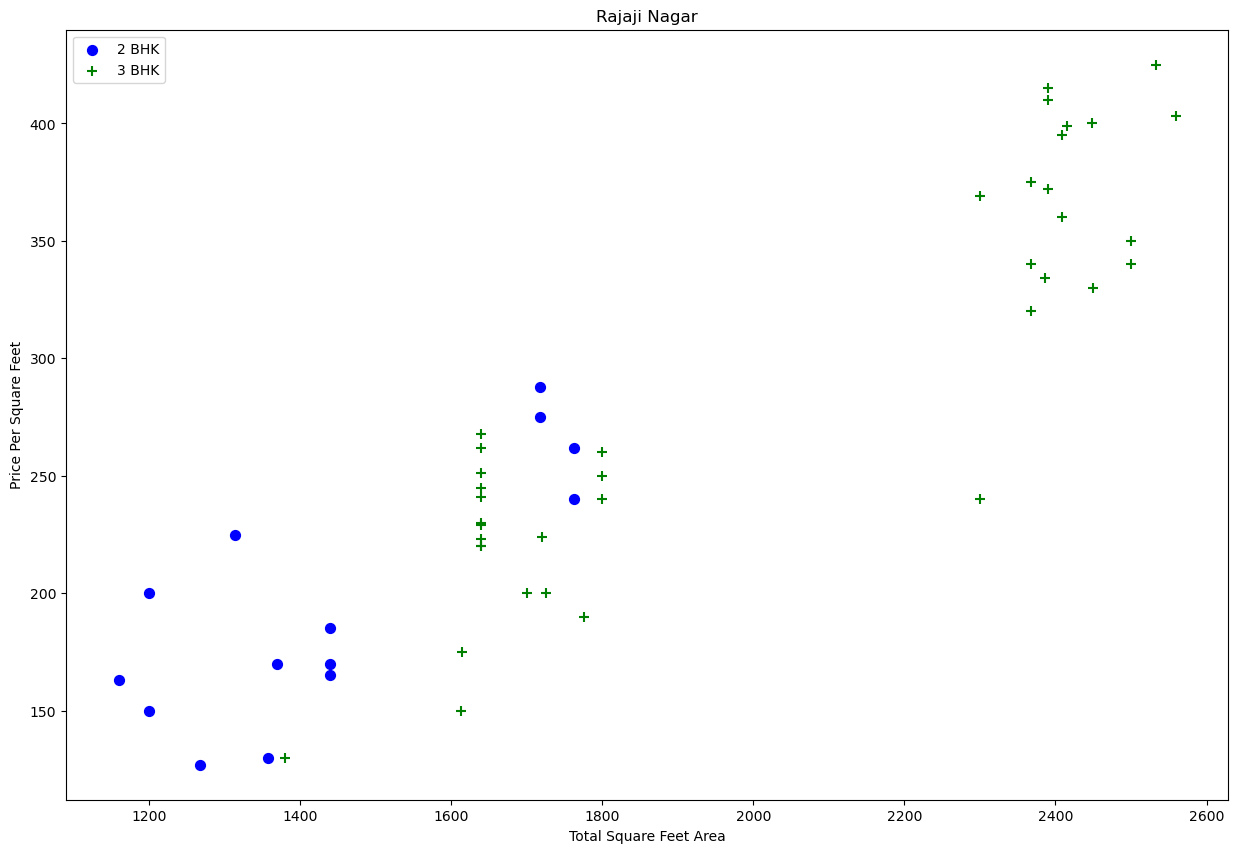

In [32]:
# another thing to check is that whether for 2bhk the property price are less than the ones greater than that
def plot_scatter_chart(df,location):
    bhk2=df[(df.location==location) & (df.bhk==2)]
    bhk3=df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    plt.show()

plot_scatter_chart(cleaned_df_3,"Rajaji Nagar")

In [36]:
# we can see here in the chart that there are few datapoints which are higher than dataplus i.e., 3bhk in that area is low than 2bhk which is not acceptable
# to handle it we will do:
def remove_bhk_outliers(df):
    exclude_indices =np.array([])
    # for every df based on location we r creating a new df based on bhk
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('bhk'):
            # per bhk we r computing its:
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        # loop for price less than the mean for prev bhk eg: for 2bhk we are comparing it to mean of 1bhk
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

cleaned_df_4=remove_bhk_outliers(cleaned_df_3)
cleaned_df_4.shape

(7329, 7)

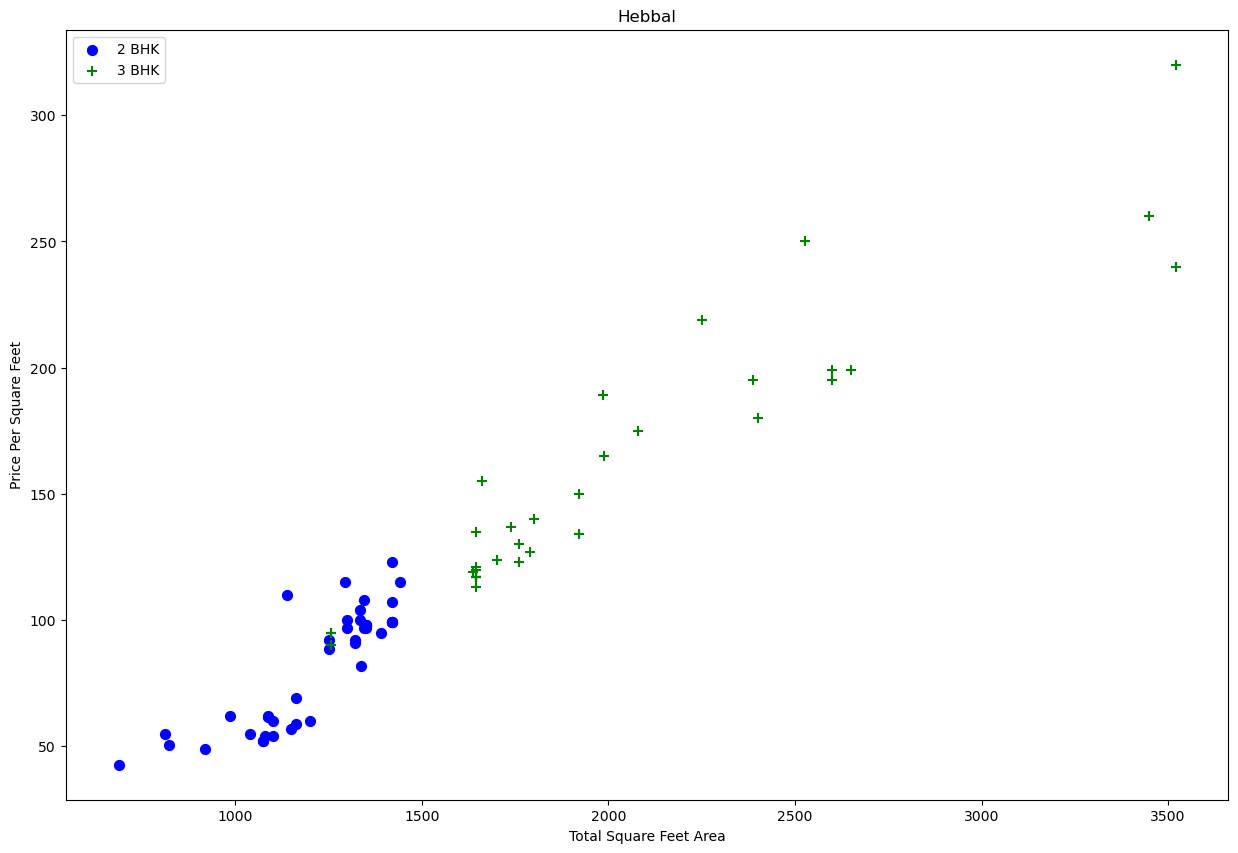

In [40]:
plot_scatter_chart(cleaned_df_4,"Hebbal")

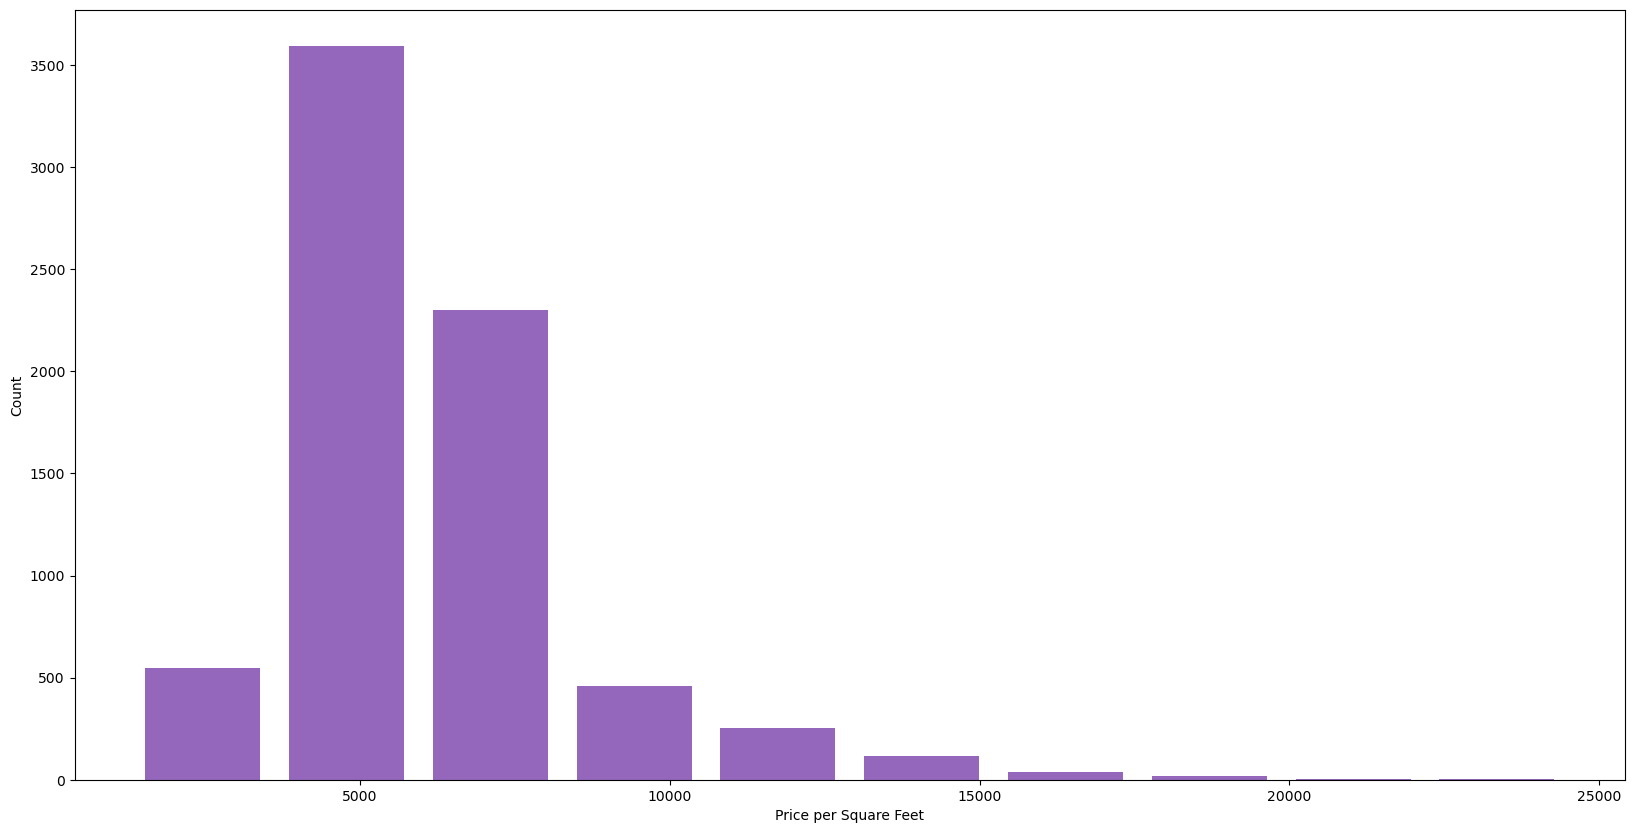

In [47]:
# plotting histogram for checking how many apt or property we have per sqft area
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(cleaned_df_4.price_per_sqft,rwidth=0.8)
plt.xlabel("Price per Square Feet")
plt.ylabel("Count")
plt.show()

In [48]:
# exploring bathroom feature
cleaned_df_4.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [50]:
# we saw a datapoint of bath feature having 13 i.e., 13 bathroom which is not possib in a household so:
cleaned_df_4[cleaned_df_4.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


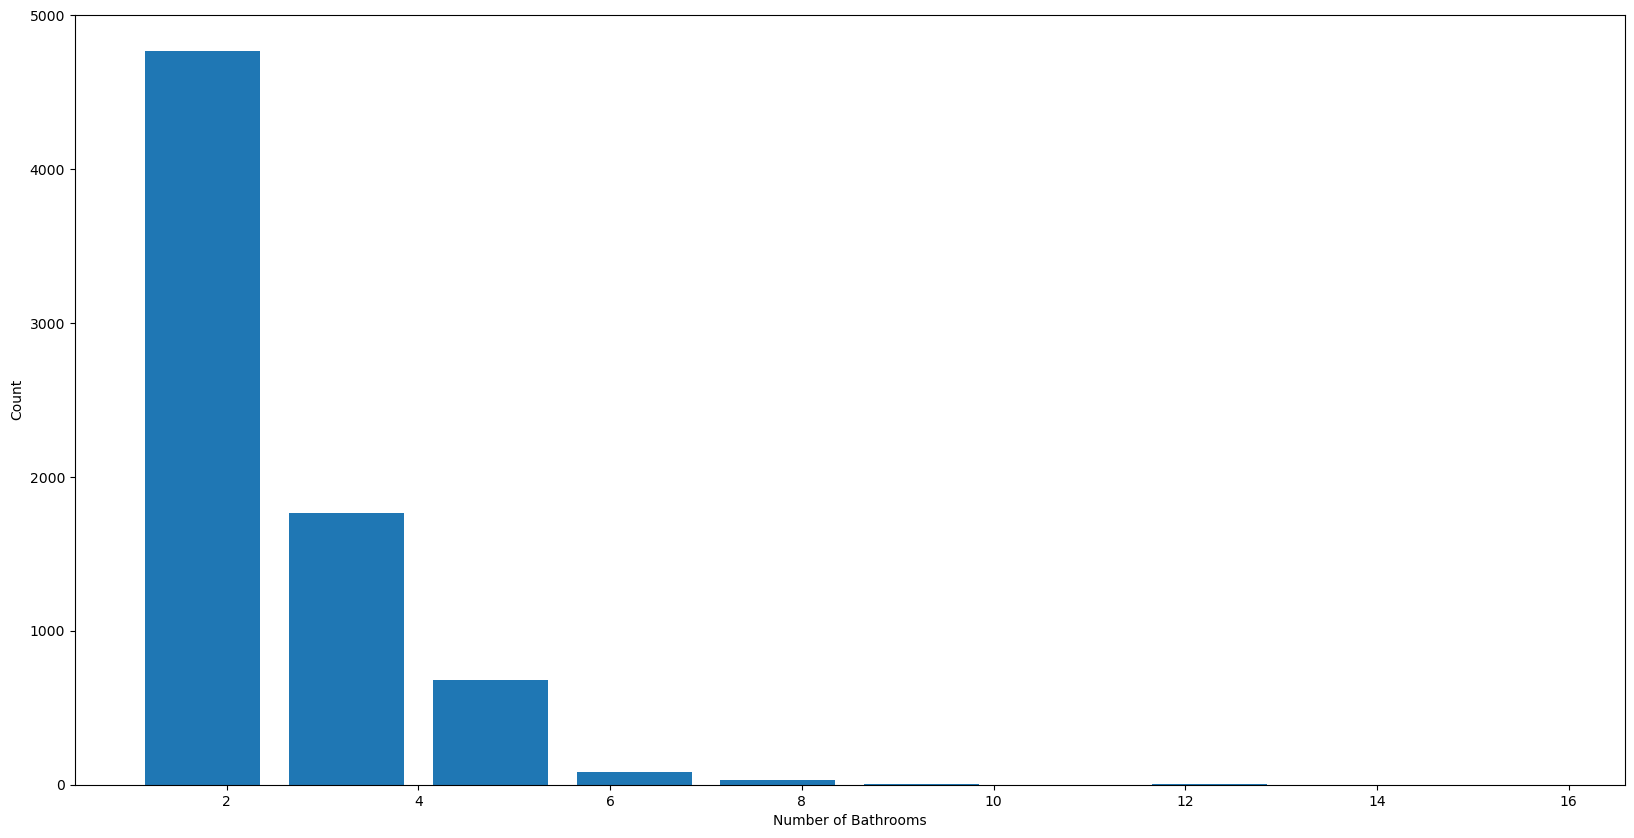

In [51]:
# since it is an unusual thing to have this many bathrooms then:
plt.hist(cleaned_df_4.bath,rwidth=0.8)
plt.xlabel("Number of Bathrooms")
plt.ylabel("Count")
plt.show()

In [53]:
# so we can conclude that for a house having (number of bedrooms+2)<number of bathroom will be consider an outlier
cleaned_df_4[cleaned_df_4.bath>cleaned_df_4.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [55]:
cleaned_df_5=cleaned_df_4[cleaned_df_4.bath<cleaned_df_4.bhk+2]
cleaned_df_5.shape

(7251, 7)

In [56]:
df=cleaned_df_5.drop(['size','price_per_sqft'],axis='columns')
df.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


## BUILDING A ML MODEL AND TESTING IT

In [59]:
# since ML cannot read a text type then converting the location column from text to numeric by one-hot-encoding using pandas dummies method
dummies= pd.get_dummies(df.location).astype(int)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df2=pd.concat([df,dummies.drop('other',axis='columns')],axis='columns')
df2.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df3= df2.drop('location',axis='columns')
df3.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
# setting the datapoints or features which are to be trained and test
X=df3.drop('price',axis='columns')
X.head()

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
# setting the price column as label for prediction
y=df3.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [65]:
# testsize as 0.2 means that we are testing 20% of dataset while other 80% is being used for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=10)

In [69]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train) # training 
lr_clf.score(X_test,y_test) # evaluation score

0.8452277697873745

In [73]:
# applying k-fold cross validation: K-fold cross-validation is a machine learning technique that evaluates model performance by splitting a dataset into \(k\) subsets, or folds. The model is trained on all but one fold, and then evaluated on that fold. This process is repeated k times, with each fold being used for validation exactly once. The final result is the average of the k results. 
# ShuffleSplit will randomize the samples so that each fold have equal distribution of data samples
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X,y,cv=cv)
# the result shows that max time it is 80% as the eval_score for 5 folds

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [82]:
# we saw that for this k-fold we got max of 80% what about other regression techniques: like lasso, DT and so
# and to do that we do gridsearchCV by sklearn: which is an api which runs our model on diff regressor and parameter and tells the best score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

def find_best_model_GSCV(X,y):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    algos={
        'linear_regression':{
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso':{
            'model': Lasso(),
            'params': {
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
             'model': DecisionTreeRegressor(),
             'params': {
                'criterion':['squared_error','friedman_mse'],
                'splitter':['best','random']
             }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv, return_train_score=False)
        gs.fit(X_scaled,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_GSCV(X,y)

,model,best_score,best_params
0,linear_regression,0.818354,"{'fit_intercept': True, 'positive': False}"
1,lasso,0.788752,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.723342,"{'criterion': 'squared_error', 'splitter': 'be..."


In [83]:
# so if we see our features in column form as:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [85]:
# and to retrieve an index for a specific location considering from 0-n
np.where(X.columns=='5th Block Hbr Layout')[0][0]

7

In [86]:
# after the gridsearch we concluded the bestscore among the 3 was of linear Regression
# then using lr_clf which was used previously for predicting samples i.e., testing
def predict_price(location,sqft,bath,bhk):
    loc_indx=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    if loc_indx>=0:
        x[loc_indx]=1
    return lr_clf.predict([x])[0]

In [92]:
# note this is giving price in lakh so for this one foreg it is 90 lacs and so
predict_price('5th Block Hbr Layout',2000,2,2)

C:\Users\rizza\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.32317608431696

In [91]:
predict_price('5th Phase JP Nagar',2000,2,2)

C:\Users\rizza\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


122.0887151380182

In [94]:
# if we note that if we increase the bhk we may see that price is reducing which may seem doubting but it is just the matter of how the construction has been for that house
# foreg if a house has more rooms and 2 bath and gives less price then it can be a reason that space is less or etc
import pickle
with open('banglore_house_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)